#### [chapter 5.5 연습문제 8번]

In [1]:
import os
import numpy as np

# 일관된 출력을 위해 유사난수 초기화
np.random.seed(42)

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sn
sn.set()
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# 한글출력
# matplotlib.rc('font', family='AppleGothic')  # MacOS
matplotlib.rc('font', family='Malgun Gothic')  # Windows
plt.rcParams['axes.unicode_minus'] = False

In [6]:
from sklearn.svm import LinearSVC,SVC
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn import datasets

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # 꽃잎 길이, 꽃잎 너비
y = iris["target"]

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

In [7]:
C = 5
alpha = 1 / (C*len(X))

In [9]:
lin_svc = LinearSVC(loss='hinge',C=C,random_state=42)
svc= SVC(kernel='linear',C=C)
sgd_clf = SGDClassifier(loss='hinge',learning_rate='constant',eta0=0.001,tol=0.001,alpha=alpha,max_iter=10000,random_state=42)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
lin_svc.fit(X_scaled,y)
svc.fit(X_scaled,y)
sgd_clf.fit(X_scaled,y)

SGDClassifier(alpha=0.002, eta0=0.001, learning_rate='constant', max_iter=10000,
              random_state=42)

In [11]:
w1 = - lin_svc.coef_[0,0] / lin_svc.coef_[0,1]
b1 = - lin_svc.intercept_[0] / lin_svc.coef_[0,1]
w2 = - svc.coef_[0,0] / svc.coef_[0,1]
b2 = - svc.intercept_[0] / svc.coef_[0,1]
w3 = - sgd_clf.coef_[0,0] / sgd_clf.coef_[0,1]
b3 = - sgd_clf.intercept_[0] / sgd_clf.coef_[0,1]

In [13]:
line1 = scaler.inverse_transform([[-10,-10*w1+b1],[10,10*w1+b1]])
line2 = scaler.inverse_transform([[-10,-10*w2+b3],[10,10*w2+b2]])
line3 = scaler.inverse_transform([[-10,-10*w3+b3],[10,10*w3+b3]])

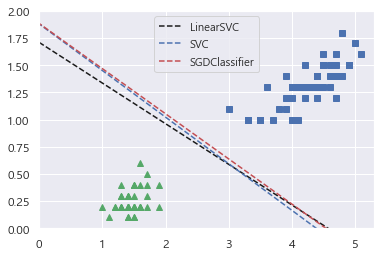

In [29]:
plt.plot(line1[:, 0],line1[:,1],"k--", label="LinearSVC")
plt.plot(line2[:, 0],line2[:,1],"b--", label="SVC")
plt.plot(line3[:, 0],line3[:,1],"r--", label="SGDClassifier")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "g^")
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
plt.axis([0,5.3,0,2])
plt.legend(loc='upper center')
plt.show()

#### [chapter 6.10 연습문제 2번]

한 노드의 지니 불순도는 일반적으로 부모의 불순도보다 작다.
이유는 자식의 지니 불순도의 가중치 합을 최소화하기 위해 각 노드를 분할하는 CART 알고리즘의 비용함수(cost function) 때문이다.

CART 알고리즘의 비용 함수(cost function)는 다음과 같다.

$$
J\left(k, t_k \right) = \frac{m_{\text{left}}}{m} G_{\text{left}} + \frac{m_{\text{right}}}{m} G_{\text{right}}
$$
- $G_{\text{left/right}}$ : 왼쪽/오른쪽 자식노드의 불순도(지니계수)
- $m_{\text{left/right}}$ : 왼쪽/오른쪽 자식노드의 데이터(샘플) 수

이 비용함수를 최소화할 수 있게 분할한다,

#### [chapter 6.10 연습문제 3번 변형] 결정 트리가 훈련 세트에 과대적합되었을 때의 해결방안을 2가지 이상 서술해주세요. (어떤 하이퍼파라미터를 어떻게 조정해야하는지를 서술하시면 됩니다.)



모델을 규제해야하기 때문에 매개변수에서 min_으로 시작하는 매개변수를 증가 시키거나, max_로 시작하는 매개변수를 감소시킨다.